## Data Transformation

In [ ]:
# Loading the .csv data as Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv')

In [ ]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


### Handling Outliers

<Figure size 1400x1800 with 0 Axes>

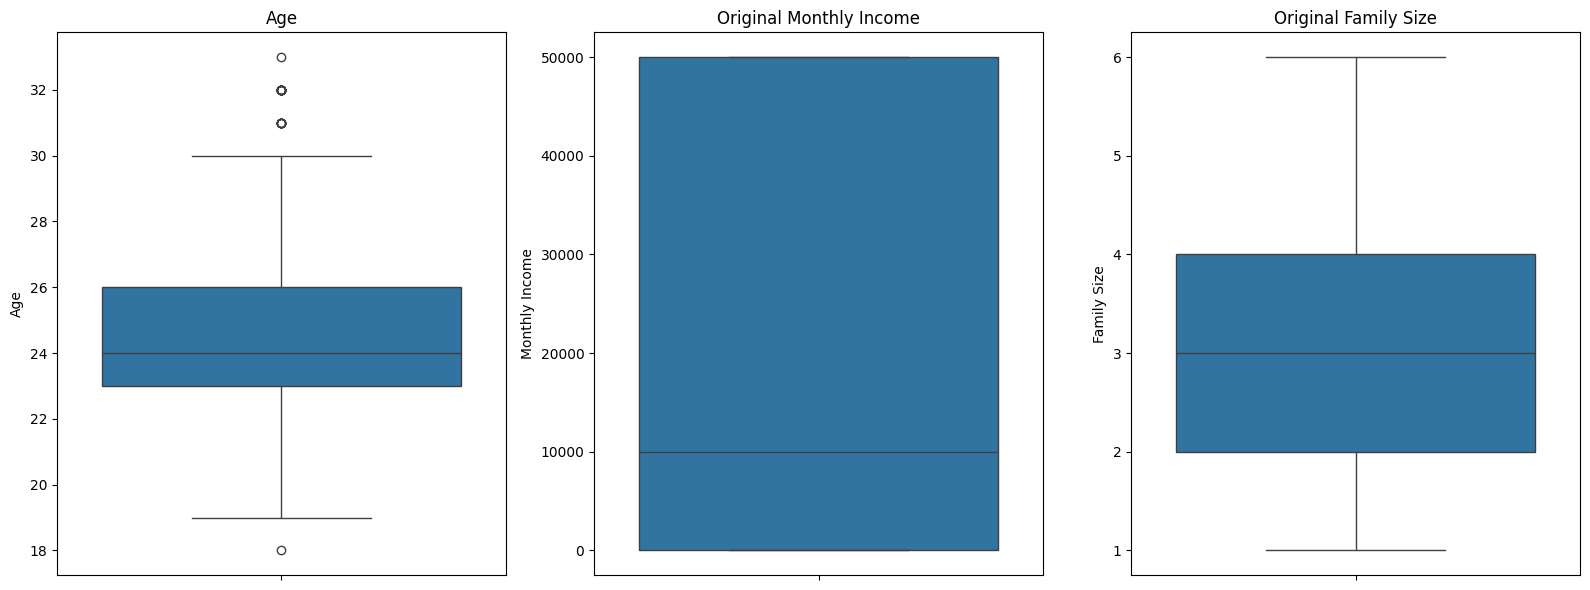

In [ ]:
plt.figure(figsize=(14, 18))

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Boxplot for 'Age'
sns.boxplot(y=df['Age'], ax=axes[0])
axes[0].set_title('Age')
axes[0].set_ylabel('Age')

# Boxplot for 'Monthly Income'
sns.boxplot(y=df['Monthly Income'], ax=axes[1])
axes[1].set_title('Original Monthly Income')
axes[1].set_ylabel('Monthly Income')

# Boxplot for 'Family Size'
sns.boxplot(y=df['Family size'], ax=axes[2])
axes[2].set_title('Original Family Size')
axes[2].set_ylabel('Family Size')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Age has some outliers

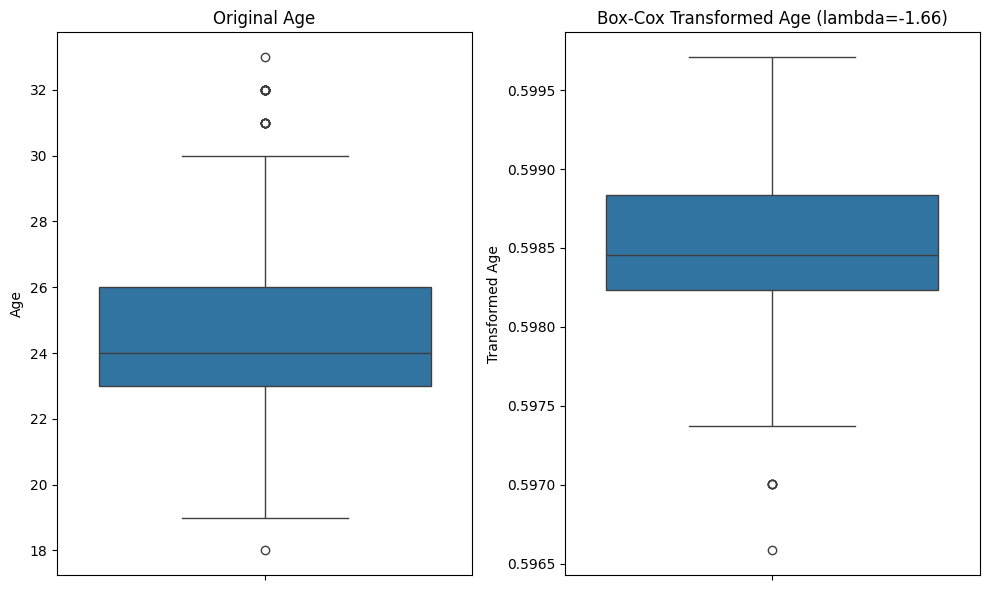

In [ ]:
# Applying the Box-Cox transformation
transformed_age, lambda_age = boxcox(df['Age'])

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Boxplot for 'Age'
sns.boxplot(y=df['Age'], ax=axes[0])
axes[0].set_title('Original Age')
axes[0].set_ylabel('Age')

sns.boxplot(y=transformed_age, ax=axes[1])
axes[1].set_title(f'Box-Cox Transformed Age (lambda={lambda_age:.2f})')
axes[1].set_ylabel('Transformed Age')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Features Encoding

In [ ]:
numeric_features = ['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude', 'Pin code']
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications', 'Output', 'Feedback']

# One-hot encoding for categorical features
encoded_df = pd.get_dummies(df[categorical_features], drop_first=True)

# Include numerical features directly
encoded_df[numeric_features] = df[numeric_features]

# Display the result of encoding
print("Encoded DataFrame:")
encoded_df.head()

Encoded DataFrame:


,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive,Age,Monthly Income,Family size,latitude,longitude,Pin code
0,False,False,True,False,False,True,False,True,False,False,True,True,20,0,4,12.9766,77.5993,560001
1,False,False,True,False,False,True,False,False,False,False,True,True,24,10000,3,12.9770,77.5773,560009
2,True,False,True,False,False,True,False,True,False,False,True,False,22,10000,3,12.9551,77.6593,560017
3,False,False,True,False,False,True,False,False,False,False,True,True,22,0,6,12.9473,77.5616,560019
4,True,False,True,False,False,True,False,True,False,False,True,True,22,10000,4,12.9850,77.5533,560010


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for scaling
scaler = StandardScaler()
# Apply standard scaling to numerical features only
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(encoded_df[numeric_features]), columns=numeric_features)

# Combine scaled numerical features with one-hot encoded categorical features
final_encoded_df = encoded_df.copy()
final_encoded_df[numeric_features] = scaled_numeric_df

# Display the result
print("Final Encoded DataFrame:")
print(final_encoded_df.head())

# Label Encoding on Target Feature (Output)
label_encoder = LabelEncoder()
final_encoded_df['Output'] = label_encoder.fit_transform(df['Output'])


Final Encoded DataFrame:
   Gender_Male  Marital Status_Prefer not to say  Marital Status_Single  \
0        False                             False                   True   
1        False                             False                   True   
2         True                             False                   True   
3        False                             False                   True   
4         True                             False                   True   

   Occupation_House wife  Occupation_Self Employeed  Occupation_Student  \
0                  False                      False                True   
1                  False                      False                True   
2                  False                      False                True   
3                  False                      False                True   
4                  False                      False                True   

   Educational Qualifications_Ph.D  Educational Qualifications_Post Gradu

### Multicollinearity Treatment Using Variance Inflation Factor (VIF)

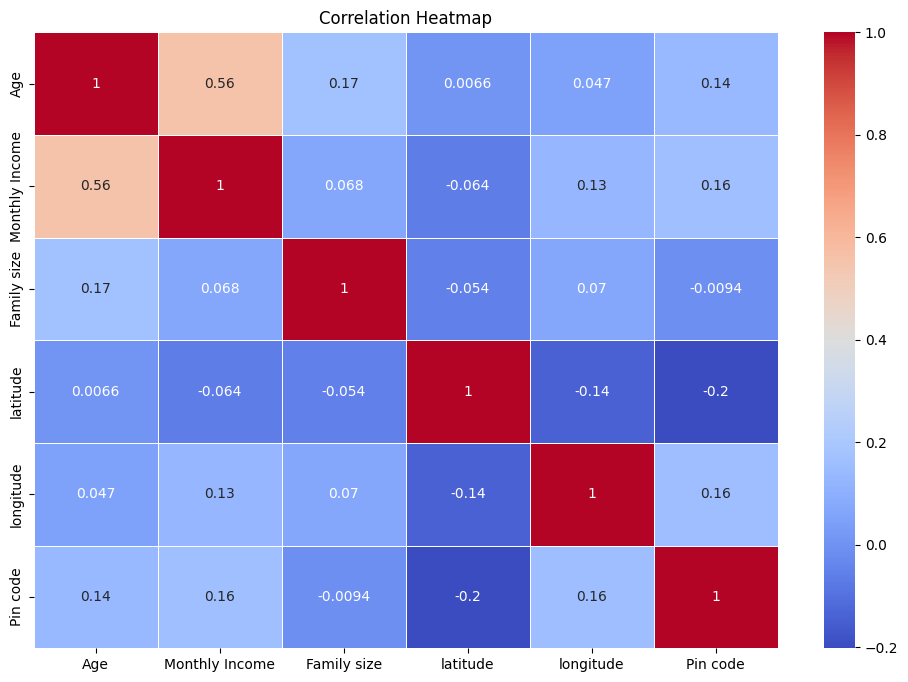

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Multicollinearity Treatment Using Variance Inflation Factor (VIF)
def calculate_vif(X):
    """
    Calculate VIF for each feature in the DataFrame.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for the features
vif_df = calculate_vif(final_encoded_df)

# Print the VIF values
print("VIF values:")
print(vif_df)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Identify features with high VIF (typically VIF > 5 indicates multicollinearity)
high_vif_features = vif_df[vif_df['VIF'] > 5]['Feature']

In [ ]:
# Drop features with high VIF from the DataFrame
final_encoded_df_filtered = final_encoded_df.drop(high_vif_features, axis=1, errors='ignore')

print(f'Features with high Variance Inflation Factor, hence need to be dropped are: \n\n{high_vif_features}')

# Display the final DataFrame after VIF filtering
print("Filtered DataFrame:")
print(final_encoded_df_filtered.head())

Features with high Variance Inflation Factor, hence need to be dropped are: 

0                        Gender
1                Marital Status
2                    Occupation
3    Educational Qualifications
4                        Output
5                      Feedback
Name: Feature, dtype: object
Filtered DataFrame:
        Age  Monthly Income  Family size  latitude  longitude  Pin code
0 -1.557620       -0.908184     0.532929  0.102224  -0.016759 -1.247274
1 -0.211614       -0.463543    -0.208205  0.111227  -0.445712 -0.992164
2 -0.884617       -0.463543    -0.208205 -0.381663   1.153112 -0.737055
3 -0.884617       -0.908184     2.015198 -0.557212  -0.751828 -0.673278
4 -0.884617       -0.463543     0.532929  0.291278  -0.913660 -0.960276


### Treating Class Imbalance Using SMOTETomek

In [ ]:
# Handling Class Imbalance Using SMOTETomek
X = final_encoded_df_filtered.drop(['Output'], axis=1)  # Features
y = final_encoded_df_filtered['Output']               # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the SMOTETomek object
smotetomek = SMOTETomek(random_state=42)

# Resample the training data
X_resampled, y_resampled = smotetomek.fit_resample(X_train, y_train)

# To verify the balancing effect, check the class distribution
print("Before resampling:")
print(y_train.value_counts())

print("\nAfter resampling:")
print(pd.Series(y_resampled).value_counts())

KeyError: "['Output_Yes'] not found in axis"

In [ ]:
# Convert y_resampled Series to DataFrame
y_resampled_df = pd.DataFrame(y_resampled, columns=['Output'])

# Set the figure size
plt.figure(figsize=(4, 3))

# Create the countplot
ax = sns.countplot(data=y_resampled_df, x='Output')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.title('Class Distribution After Resampling')
plt.show()